In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

print("Shape of train: ", df_train.shape)
print("Shape of test: ", df_test.shape)

Shape of train:  (1460, 81)
Shape of test:  (1459, 80)


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
#drop id as it is not required for training or prediction
train_ID = df_train['Id']
test_ID = df_test['Id']

df_train.drop(['Id'], axis=1, inplace=True)
df_test.drop(['Id'], axis=1, inplace=True)

df_train.shape, df_test.shape

((1460, 80), (1459, 79))

In [5]:
sns.set_style('whitegrid')
edgecolor = 'black'

fig = plt.figure(figsize=(12,12))

#function to plot scatter plot between a feature and the Sale Price 
def scatter_plot(a):
    fig, ax = plt.subplots()
    ax.scatter(x = df_train[a], y = df_train['SalePrice'], edgecolor=edgecolor)
    plt.ylabel('SalePrice', fontsize=12)
    plt.xlabel(a, fontsize=12)
    plt.suptitle("Scatter Plot of "+ a + " and SalePrice")
    plt.show()

<Figure size 1200x1200 with 0 Axes>

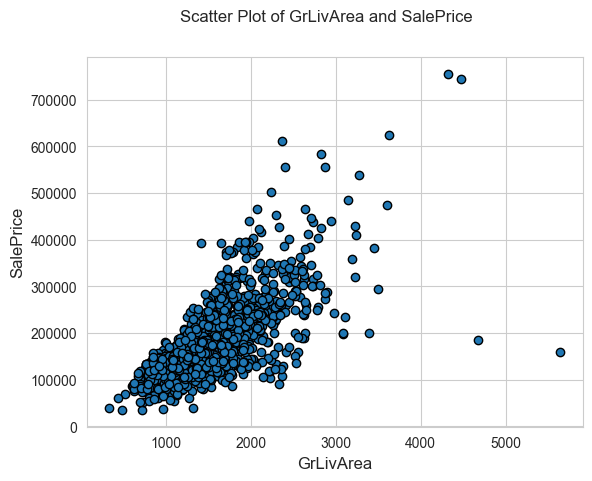

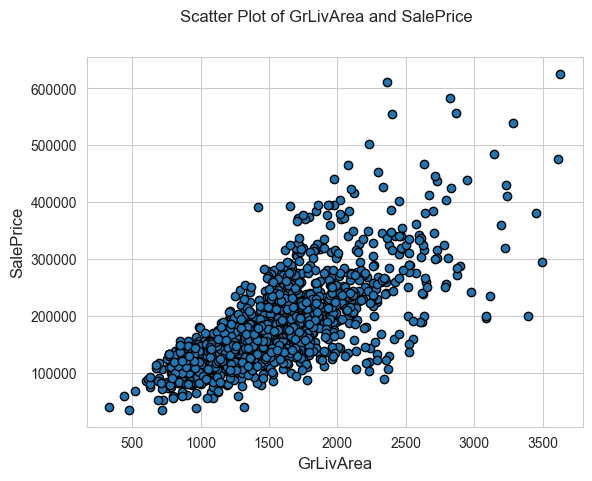

In [9]:
#Deleting outliers
df_train =  df_train.drop( df_train[( df_train['GrLivArea'] > 4000) & ( df_train['SalePrice']<300000)].index)

#Check the graphic again
scatter_plot('GrLivArea')

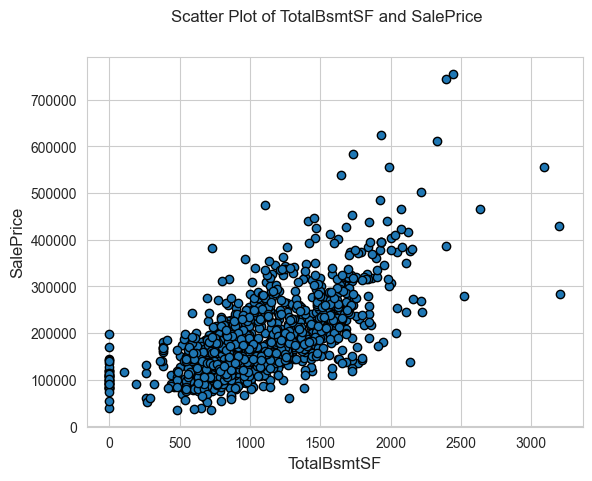

In [8]:
scatter_plot('TotalBsmtSF')

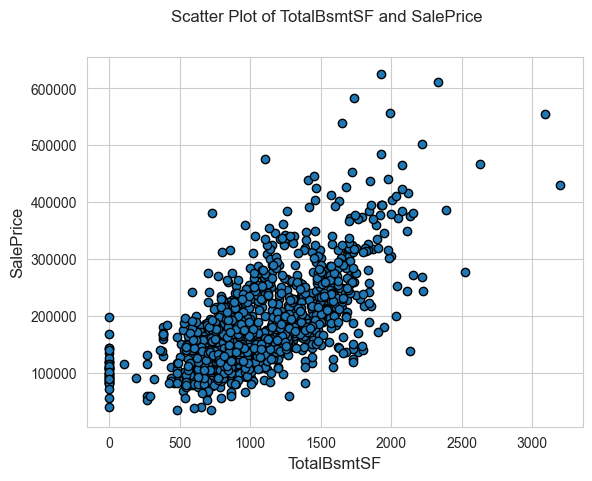

In [10]:
#Deleting outliers
df_train =  df_train.drop( df_train[( df_train['TotalBsmtSF'] > 3000) & ( df_train['SalePrice']<300000)].index)

#Check the graphic again
scatter_plot('TotalBsmtSF')

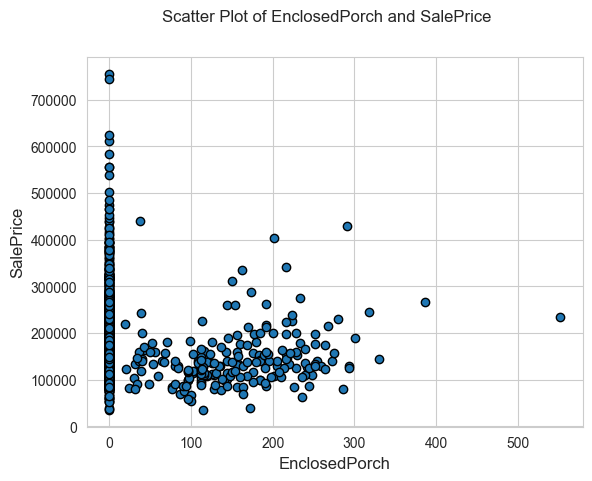

In [15]:
scatter_plot('EnclosedPorch')

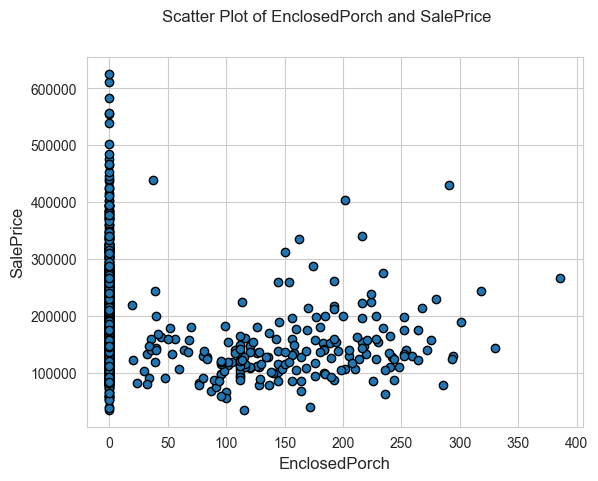

In [11]:
#Deleting outliers
df_train =  df_train.drop( df_train[( df_train['EnclosedPorch']>400)].index)

#Deleting outliers
df_train =  df_train.drop( df_train[( df_train['SalePrice']>700000)].index)

#check plot again
scatter_plot('EnclosedPorch')

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_59344/1994248853.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'])


Skewness: 1.570993


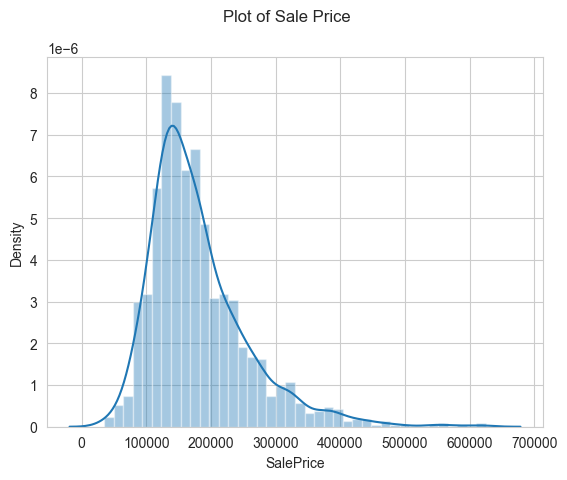

In [12]:
sns.distplot(df_train['SalePrice'])

plt.suptitle( "Plot of Sale Price")

print("Skewness: %f" % df_train['SalePrice'].skew())

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_59344/2944919078.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'])


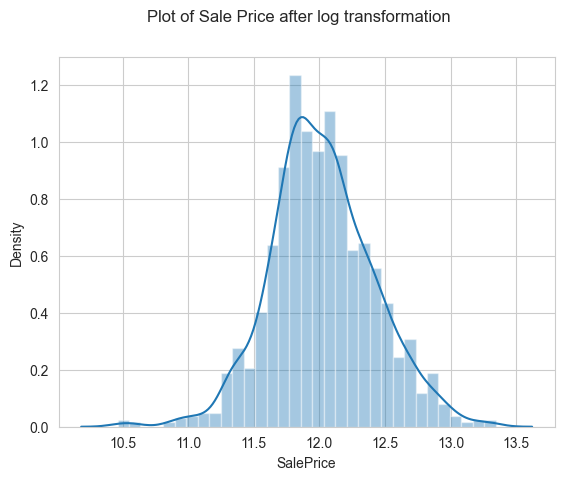

In [13]:
# applying log transformation to correct the positive skewness in the data
# taking logs means that errors in predicting expensive and cheap houses will affect the result equally

df_train['SalePrice'] = np.log(df_train['SalePrice'])
plt.suptitle("Plot of Sale Price after log transformation")
sns.distplot(df_train['SalePrice'])
plt.show()

In [14]:
df_train.shape

(1454, 80)

In [15]:
# save the 'SalePrice'column as train_label
train_label = df_train['SalePrice'].reset_index(drop=True)

# # drop 'SalePrice' column from df_train 
df_train = df_train.drop(['SalePrice'], axis=1)
# # now df_train contains all training features

In [16]:
# function to HANDLE the missing data in a dataframe
def missing (df):
    
    # drop theses columns due to large null values or many same values
    df = df.drop(['Utilities','PoolQC','MiscFeature','Alley'], axis=1)
    
    # Null value likely means No Fence so fill as "None"
    df["Fence"] = df["Fence"].fillna("None") 
    
    # Null value likely means No Fireplace so fill as "None"
    df["FireplaceQu"] = df["FireplaceQu"].fillna("None")
    
    # Lot frontage is the feet of street connected to property, which is likely similar to the neighbourhood houses, so fill Median value
    df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].median())
    
    # Null value likely means  typical(Typ)
    df["Functional"] = df["Functional"].fillna("Typ")
    
    # Only one null value so fill as the most frequent value(mode)
    df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])  
    
    # Only one null value so fill as the most frequent value(mode)
    df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
    
    # Very few null value so fill with the most frequent value(mode)
    df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
    
    # Null value likely means no masonry veneer
    df["MasVnrType"] = df["MasVnrType"].fillna("None") #so fill as "None" (since categorical feature)
    df["MasVnrArea"] = df["MasVnrArea"].fillna(0)      #so fill as o
    
    # Only one null value so fill as the most frequent value(mode)
    df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
    df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
    
    #MSZoning is general zoning classification,Very few null value so fill with the most frequent value(mode)
    df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
    
    #Null value likely means no Identified type of dwelling so fill as "None"
    df['MSSubClass'] = df['MSSubClass'].fillna("None")
    
    # Null value likely means No Garage, so fill as "None" (since these are categorical features)
    for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
        df[col] = df[col].fillna('None')
    
    # Null value likely means No Garage and no cars in garage, so fill as 0
    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        df[col] = df[col].fillna(0)
    
    # Null value likely means No Basement, so fill as 0
    for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
        df[col] = df[col].fillna(0)
    
    # Null value likely means No Basement, so fill as "None" (since these are categorical features)
    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        df[col] = df[col].fillna('None')
    
    return df

In [17]:
df_train = missing(df_train)
df_test = missing(df_test)

In [18]:
# calculate total number of null values in training data
null_train = df_train.isnull().sum().sum()
print(null_train)

# calculate total number of null values in test data
null_test = df_test.isnull().sum().sum()
print(null_test)

0
0


In [19]:
df_train.shape,df_test.shape

((1454, 75), (1459, 75))

In [20]:
def add_new_cols(df):
    
    df['Total_SF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

    df['Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] 
                             + (0.5 * df['BsmtHalfBath']))

    df['Total_Porch_SF'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + 
                            df['ScreenPorch'] + df['WoodDeckSF'])

    df['Total_Square_Feet'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF'])
    
    df['Total_Quality'] = df['OverallQual'] + df['OverallCond']
    
    return df

In [21]:
# add the new columns
df_train = add_new_cols(df_train)
df_test = add_new_cols(df_test)

In [22]:
df_train.shape,df_test.shape

((1454, 80), (1459, 80))

In [27]:
#get dummy values for categorical data
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

print(df_train.shape)
print(df_test.shape)

(1454, 292)
(1459, 278)


In [28]:
#align the training and testing data
df_train, df_test = df_train.align(df_test, join = 'inner', axis=1)

In [29]:
print(df_train.shape)
print(df_test.shape)

(1454, 278)
(1459, 278)


In [30]:
# calculate total number of null values in training data
null_train = df_train.isnull().sum().sum()
print(null_train)

# calculate total number of null values in test data
null_test = df_test.isnull().sum().sum()
print(null_test)

0
0


In [31]:
X_test = df_test           # testing features

In [32]:
df_train["SalePrice"] = train_label

In [34]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

In [35]:
train_set, valid_set = train_test_split(df_train,train_size= 0.7, shuffle=False)

X_train = train_set.drop(["SalePrice"], axis=1)  # training features
y_train = train_set["SalePrice"].copy()             # training label

X_valid = valid_set.drop(["SalePrice"], axis=1)  # testing features
y_valid = valid_set["SalePrice"].copy()               # testing label

In [36]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print()
print("X_valid shape: {}".format(X_valid.shape))
print("y_valid shape: {}".format(y_valid.shape))
print()
print("X_test shape: {}".format(X_test.shape))

X_train shape: (1017, 278)
y_train shape: (1017,)

X_valid shape: (437, 278)
y_valid shape: (437,)

X_test shape: (1459, 278)


In [37]:
null_v_x = X_valid.isnull().sum().sum()
print(null_v_x)

null_v_y = y_valid.isnull().sum().sum()
print(null_v_y)

0
6


In [38]:
np.where(np.isnan(y_valid))

(array([431, 432, 433, 434, 435, 436]),)

In [39]:
# replace null values by mean value of y_valid column
mean = np.nanmean(y_valid)
y_valid = np.nan_to_num(y_valid,nan = mean)

In [40]:
#check again
np.where(np.isnan(y_valid))

(array([], dtype=int64),)

In [41]:
y_valid.dtype

dtype('float64')

In [51]:
print("Valid data shape:")
print(X_valid.shape, y_valid.shape)

Valid data shape:
(437, 278) (437,)


In [63]:
# calculating cross validation score with scoring set to negative mean absolute error
def cross_validation(model):
    
    scores = np.sqrt(-cross_val_score(model, X_train, y_train, cv = 12, scoring = "neg_mean_squared_error"))
    mean = np.mean(scores)
    print("Mean CV score: ",mean)

In [64]:
# function to calculate Root mean square error (RMSE)
def rmse(y_pred, y_train): 
    
    rmse_ = np.sqrt(metrics.mean_squared_error(y_pred,y_train))
    print("rmse: ", rmse_)

In [65]:
# function to plot actual vs predicited label
def actual_vs_pred_plot(y_train,y_pred):
    
    fig = plt.figure(figsize=(12,12))
    fig, ax = plt.subplots()
    
    ax.scatter(y_train, y_pred,color = "teal",edgecolor = 'lightblue')
    ax.plot([y_train.min(),y_train.max()], [y_train.min(), y_train.max()], 'k--',lw=0.2)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    plt.suptitle("Actual vs Predicted Scatter Plot",size=14)
    plt.show()

In [66]:
reg = linear_model.LinearRegression()

In [67]:
cross_validation(reg)

Mean CV score:  0.48868261898110843


In [68]:
#fit on training
model_reg = reg.fit(X_train, y_train)

#predict value of sale price on the training set
y1_pred = reg.predict(X_train)

#caculate root mean square error
rmse(y1_pred,y_train)

rmse:  0.353864252947742


In [69]:
#predict value of sale price on the validation set
y1_pred_v = reg.predict(X_valid)

#caculate root mean square error
rmse(y1_pred_v, y_valid)

rmse:  0.42374731804249915


<Figure size 1200x1200 with 0 Axes>

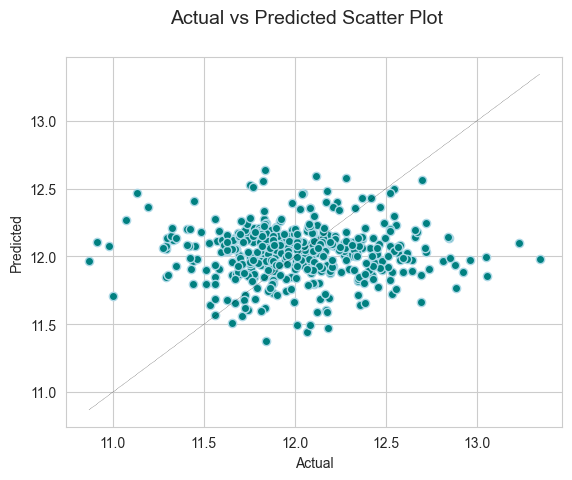

In [70]:
#plot
actual_vs_pred_plot(y_valid,y1_pred_v)